In [1]:
TFile *fin=new TFile("s4_Int_hit.root");
TTree *tree=(TTree*)fin->Get("tree");
TCanvas *c1=new TCanvas;

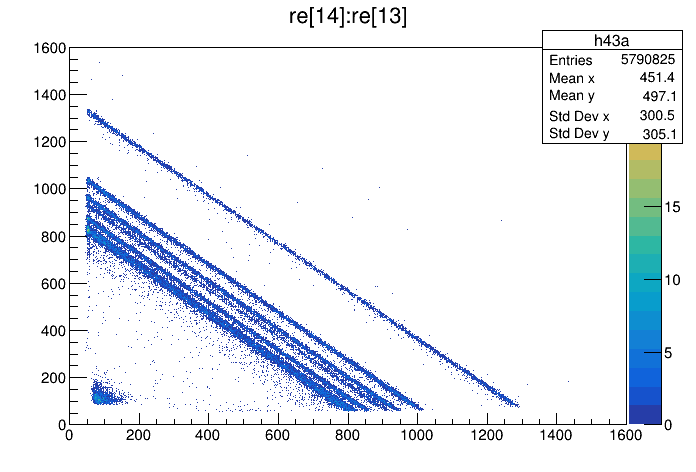

In [2]:
tree->Draw("re[14]:re[13]>>h43a(800,0,1600,800,0,1600)","","colz");
c1->Draw();

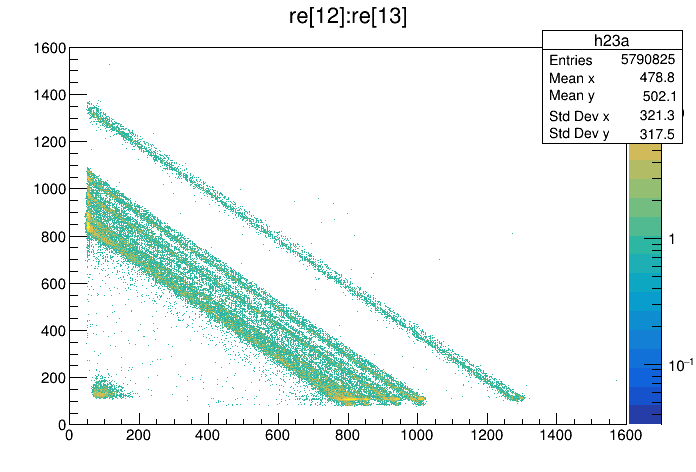

In [3]:
tree->Draw("re[12]:re[13]>>h23a(800,0,1600,800,0,1600)","","colz");
gPad->SetLogz();
c1->Draw();

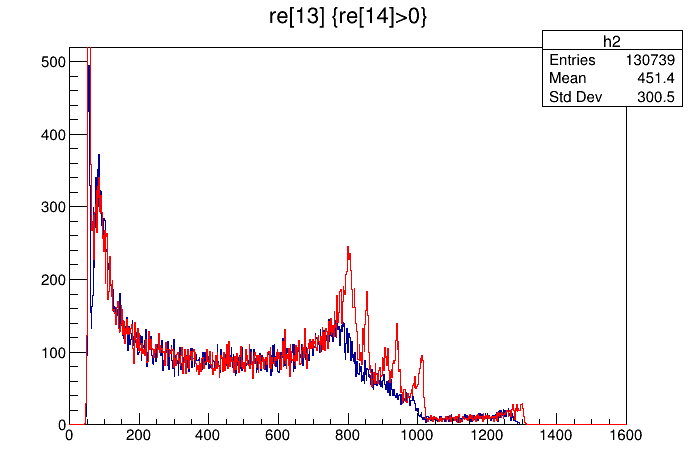

In [4]:
tree->Draw("re[13]>>h1(800,0,1600)","re[12]>0");
TH1F *h1=(TH1F*)gROOT->FindObject("h1");
tree->Draw("re[13]>>h2(800,0,1600)","re[14]>0");
h1->SetLineColor(kRed);
h1->Draw("same");
c1->Draw();

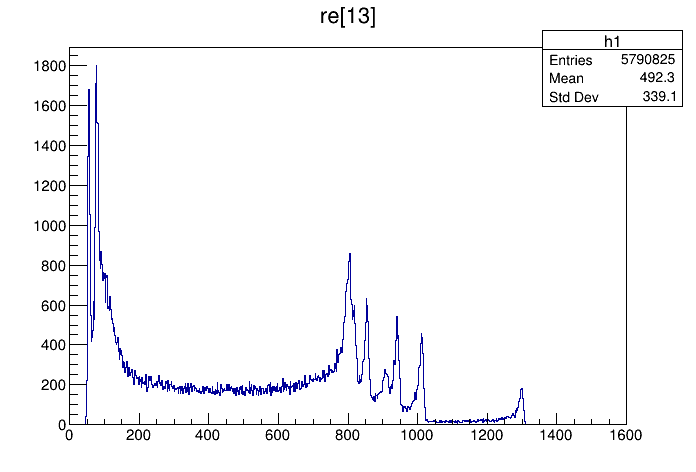

In [5]:
tree->Draw("re[13]>>h1(800,0,1600)");
c1->Draw();

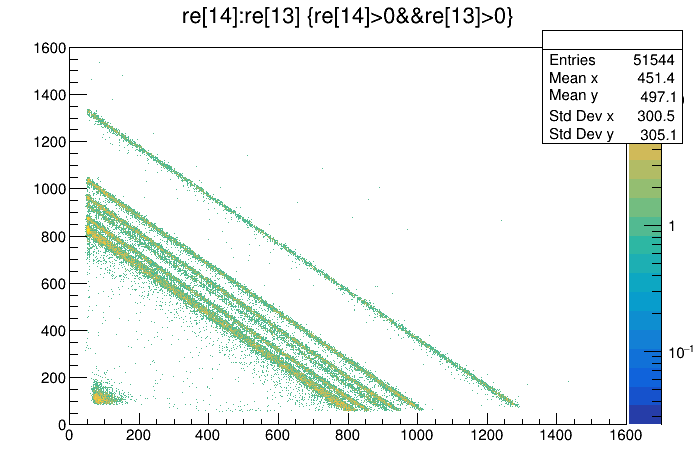

In [6]:
tree->Draw("re[14]:re[13]>>(800,0,1600,800,0,1600)","re[14]>0&&re[13]>0","colz");
c1->Draw();

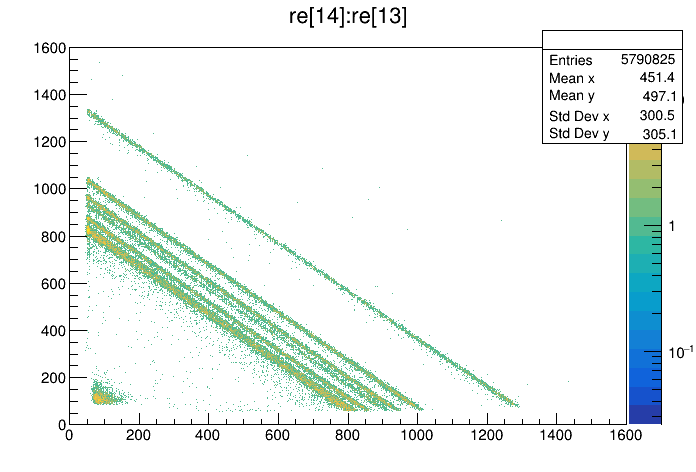

In [7]:
tree->Draw("re[14]:re[13]>>(800,0,1600,800,0,1600)","","colz");
c1->Draw();

In [8]:
gROOT->Macro("allcut.C");

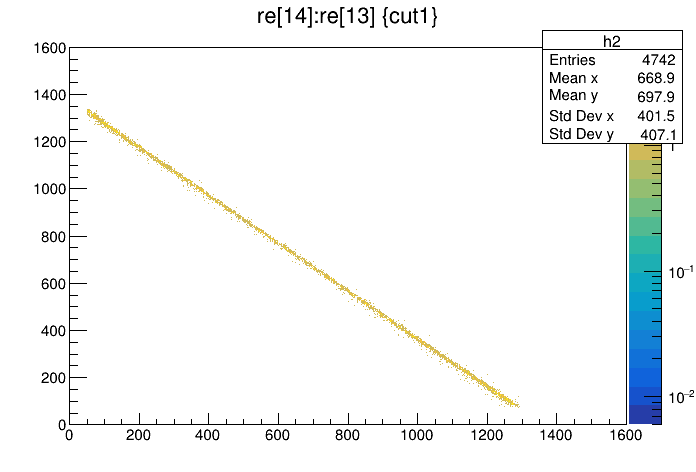

In [9]:
tree->Draw("re[14]:re[13]>>h2(800,0,1600,800,0,1600)","cut1","colz");
c1->Draw();

In [10]:
TGraph *gr;
TF1 *fp1;

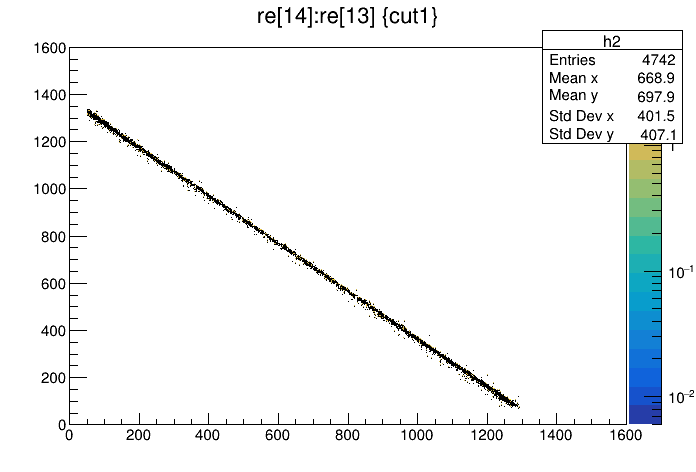

In [11]:
gr=new TGraph(tree->GetSelectedRows(),tree->GetV2(),tree->GetV1());
gr->Draw("p");//draw point
c1->Draw();

In [12]:
fp1=new TF1("fp1","pol1",0,1600);

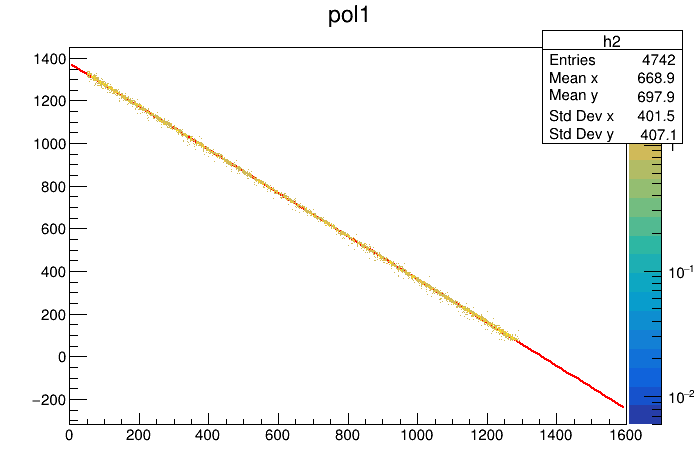


****************************************
Minimizer is Linear / Migrad
Chi2                      =       304841
NDf                       =         4740
p0                        =      1376.02   +/-   0.226274    
p1                        =     -1.01378   +/-   0.000290043 


In [13]:
fp1->SetLineColor(kRed);
gr->Fit(fp1);
fp1->Draw();
h2->Draw("same colz");
c1->Draw();

In [14]:
Double_t p0;
Double_t p1;
TString stree;

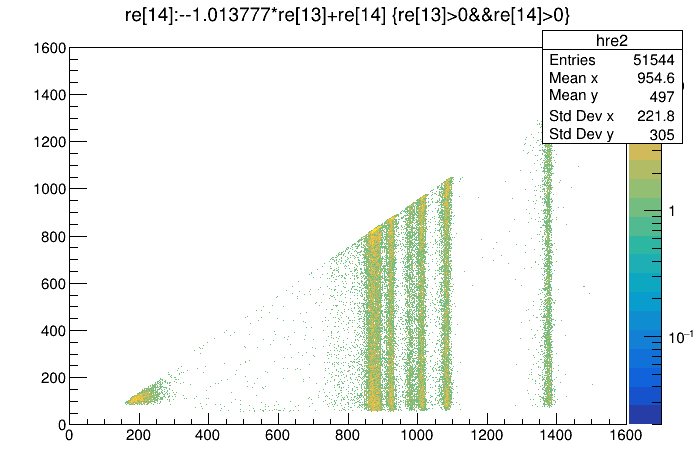

In [15]:
p0=fp1->GetParameter(0);
p1=fp1->GetParameter(1);
stree.Form("re[14]:-%f*re[13]+re[14]>>hre2(800,0,1600,800,0,1600)",p1);
tree->Draw(stree.Data(),"re[13]>0&&re[14]>0","colz");
c1->Draw();

In [16]:
TH1F *hre=(TH1F*)hre2->ProjectionX();
hre->SetName("hre");
TH1F *h13=new TH1F("h13","h13",800,0,1600);
TH1F *h14=new TH1F("h14","h14",800,0,1600);
tree->Draw("re[13]>>h13");
tree->Draw("re[14]>>h14");
h13->SetLineColor(kGreen);
h14->SetLineColor(kBlue);
hre->SetLineColor(kRed);

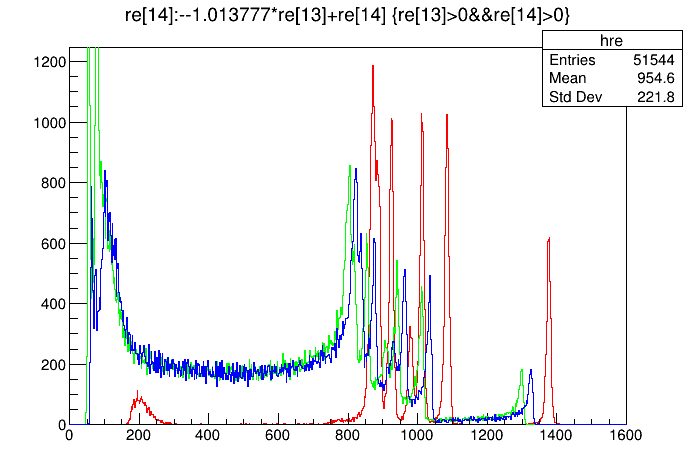

In [17]:
hre->Draw();
h13->Draw("same");
h14->Draw("same");
c1->Draw();

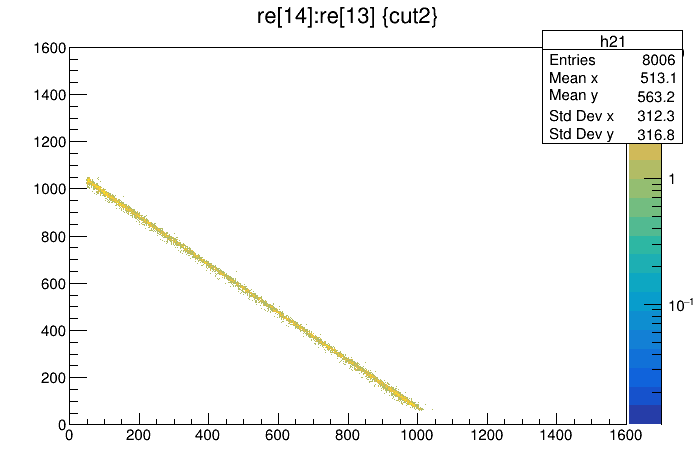

In [18]:
tree->Draw("re[14]:re[13]>>h21(800,0,1600,800,0,1600)","cut2","colz");
c1->Draw();

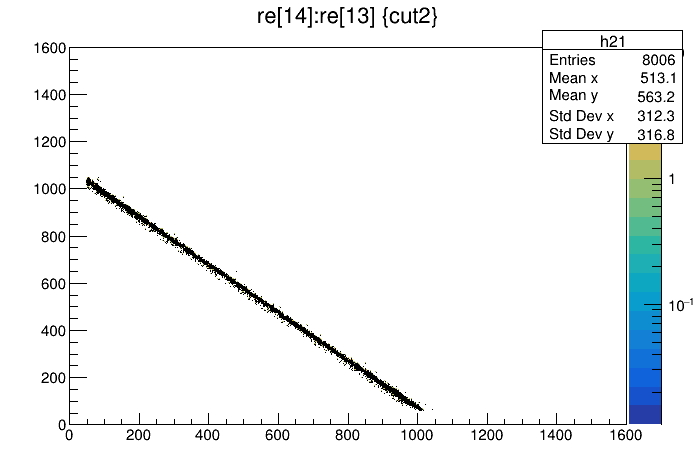

In [19]:
gr=new TGraph(tree->GetSelectedRows(),tree->GetV2(),tree->GetV1());
gr->Draw("p");//draw point
c1->Draw();

In [20]:
fp1=new TF1("fp1","pol1",0,1600);

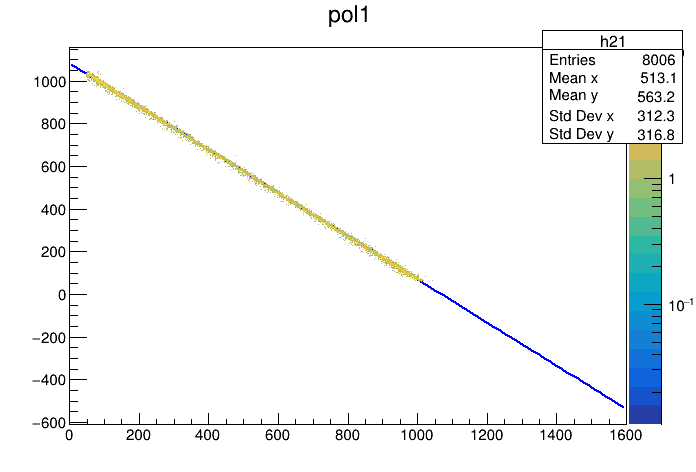


****************************************
Minimizer is Linear / Migrad
Chi2                      =       485662
NDf                       =         8004
p0                        =       1083.5   +/-   0.167431    
p1                        =     -1.01407   +/-   0.000278723 


In [21]:
fp1->SetLineColor(kBlue);
gr->Fit(fp1);
fp1->Draw();
h21->Draw("same colz");
c1->Draw();

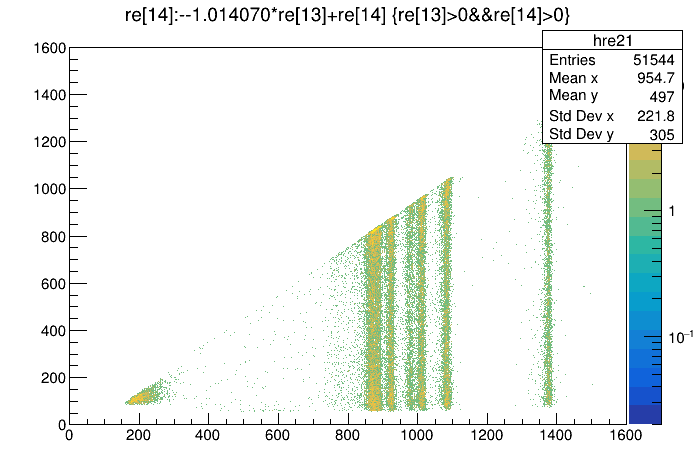

In [22]:
p0=fp1->GetParameter(0);
p1=fp1->GetParameter(1);
stree.Form("re[14]:-%f*re[13]+re[14]>>hre21(800,0,1600,800,0,1600)",p1);
tree->Draw(stree.Data(),"re[13]>0&&re[14]>0","colz");
c1->Draw();

In [23]:
TH1F *hre=(TH1F*)hre21->ProjectionX();
hre->SetName("hre");
TH1F *h13=new TH1F("h13","h13",800,0,1600);
TH1F *h14=new TH1F("h14","h14",800,0,1600);
tree->Draw("re[13]>>h13");
tree->Draw("re[14]>>h14");
h13->SetLineColor(kGreen);
h14->SetLineColor(kBlue);
hre->SetLineColor(kRed);

Warning in <TFile::Append>: Replacing existing TH1: h13 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h14 (Potential memory leak).


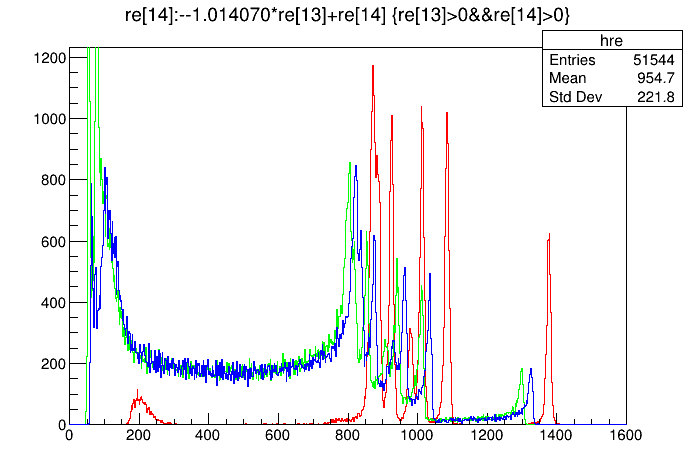

In [24]:
hre->Draw();
h13->Draw("same");
h14->Draw("same");
c1->Draw();

$$ e_x=k_x x+b_x \quad (1) \\
e_y=k_y y+b_y \quad (2) \\
e=e_x+e_y=k_x x+k_y y+(b_x+b_y) \quad (3) \\
\Longrightarrow
y=kx+b \quad (4)
k=-\frac{k_x}{k_y} \quad (5) \\
b=-\frac{e-b_x-b_y}{k_y} \quad (6) \\ $$

### * 从cut1$E_1=(e_x+e_y)_1=8.6931 MeV$条件下拟合得到$k=-\frac{k_x}{k_y}=-1.01378$和截距$b_1=-\frac{(e_x+e_y)_1-(b_x+b_y)}{k_y}=1376.02$ 

### * 从cut2$E_2=(e_x+e_y)_2=6.6708 MeV$条件下拟合得到$k=-\frac{k_x}{k_y}=-1.01407$和截距$b_2=-\frac{(e_x+e_y)_2-(b_x+b_y)}{k_y}=1083.5$ 

$ b_1=-\frac{(e_x+e_y)_1-(b_x+b_y)}{k_y}=1376.02 \quad (7) \\
b_2=-\frac{(e_x+e_y)_2-(b_x+b_y)}{k_y}=1083.5 \quad (8) \\
k=-\frac{k_x}{k_y}=-1.01378 (取cut1的k值）\quad (9)\\
由（7）（8）\Longrightarrow
k_y=0.00691 \quad (10) \\
(b_x+b_y)=-0.819840 \quad (11) \\
由（9）（10） \Longrightarrow
k_x=0.00701 \quad (12) \\
e_x=0.00701*x+b_x \\
e_y=0.00691*y+b_y \\
E=e_x+e_y=0.00701*x+0.00691*y-0.819840 $
### 我们就可以在通过某粒子在相邻两侧信号的道址得到该粒子的总沉积能量

